# Week 3 Homework - Question 11

## Implement a histogram equalization function. 

### If using <s>Matlab</s> Skimage, compare your implementation with <s>Matlab’s</s> Skimage's built-in function.

In [112]:
%matplotlib inline

#import typical packages I'll be using
import cv2
import skimage
from skimage import data

import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 16,8  #boiler plate to set the size of the figures

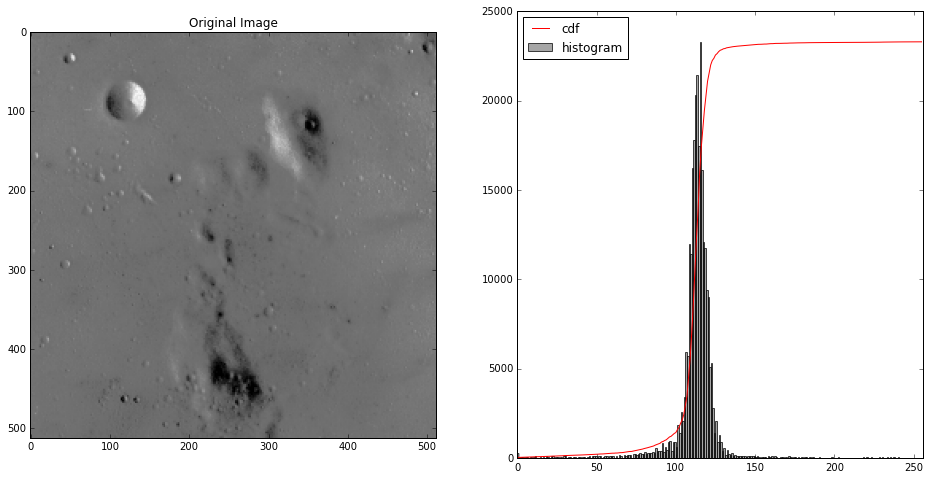

In [113]:
f, ax = plt.subplots(1,2)

img = data.moon()
width,height = img.shape

plt.gray()
ax[0].set_title('Original Image')
ax[0].imshow(img)

hist, bins = np.histogram(img, bins=256, range=[0, 256])
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

ax[1].plot(cdf_normalized, color = 'r')
ax[1].hist(img.flatten(),256,[0,256], color = 'gray', alpha = 0.7)
ax[1].set_xlim([0,256])
ax[1].legend(('cdf','histogram'), loc = 'upper left');

In [114]:
#Create the look-up table of values
table = np.round((cdf - cdf.min())/float(width*height - cdf.min())*255).astype(np.uint8)

In [115]:
#Here's what the table looks like for this image
table

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,
         2,   2,   2,   2,   2,   2,   2,   2,   3,   3,   3,   3,   3,
         3,   3,   3,   3,   3,   4,   4,   4,   4,   4,   4,   4,   5,
         5,   5,   5,   6,   6,   6,   6,   7,   7,   8,   8,   8,   9,
         9,  10,  10,  11,  12,  13,  13,  14,  15,  15,  17,  18,  21,
        23,  26,  32,  38,  49,  60,  76,  93, 113, 134, 151, 174, 190,
       201, 213, 222, 231, 236, 241, 244, 245, 247, 248, 249, 250, 250,
       251, 251, 251, 252, 252, 252, 252, 252, 252, 252, 252, 253, 253,
       253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 254, 254,
       254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254,
       254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 25

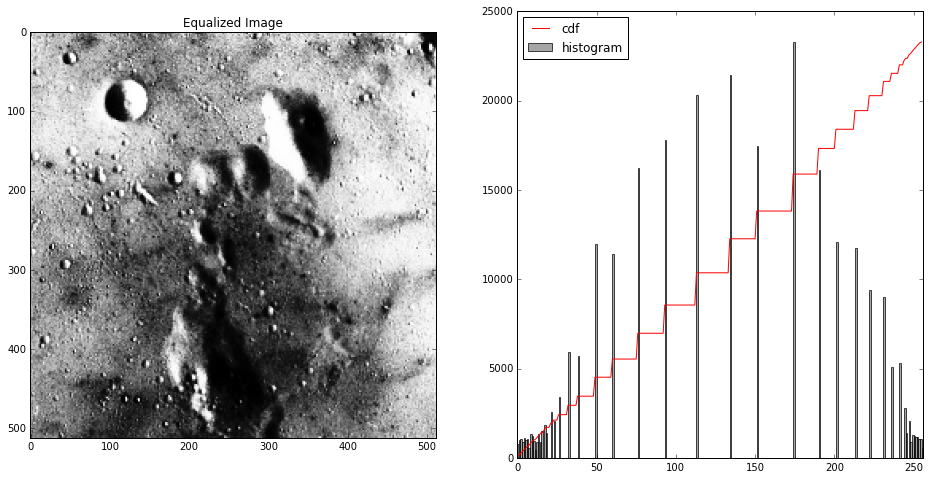

In [122]:
f, ax = plt.subplots(1,2)

img_equalized = np.zeros_like(img)
for r in range(height):
    for c in range(width):
        img_equalized[r,c] = table[img[r,c]]
        
hist, bins = np.histogram(img_equalized, bins=256, range=[0, 256])        
cdf_eq = hist.cumsum()
cdf_eq_normalized = cdf_eq * hist.max()/ cdf_eq.max()

ax[0].set_title('Equalized Image')
ax[0].imshow(img_equalized)

ax[1].plot(cdf_eq_normalized, color = 'r')
ax[1].hist(img_equalized.flatten(),256,[0,256], color = 'gray', alpha = 0.7)
ax[1].set_xlim([0,256])
ax[1].legend(('cdf','histogram'), loc = 'upper left');

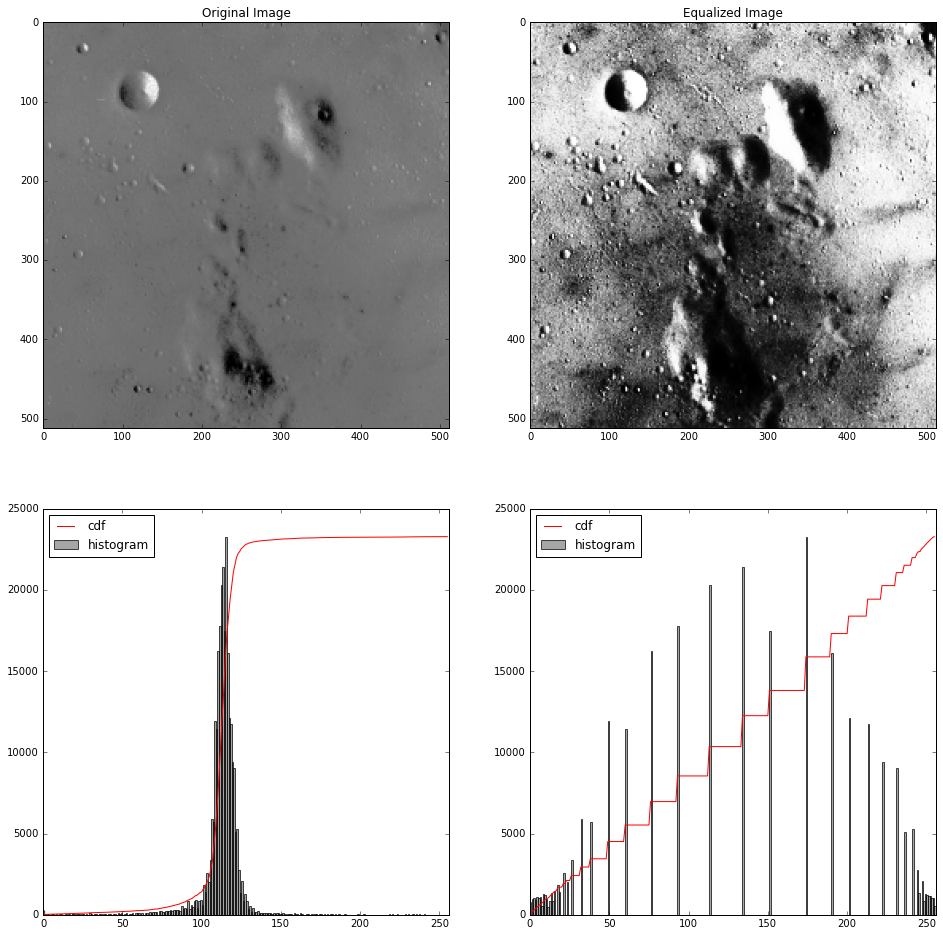

In [123]:
f, ax = plt.subplots(2,2,figsize=(16,16))

ax[0,0].set_title('Original Image')
ax[0,0].imshow(img)

ax[0,1].set_title('Equalized Image')
ax[0,1].imshow(img_equalized)

ax[1,0].plot(cdf_normalized, color = 'r')
ax[1,0].hist(img.flatten(),256,[0,256], color = 'gray', alpha = 0.7)
ax[1,0].set_xlim([0,256])
ax[1,0].legend(('cdf','histogram'), loc = 'upper left');

ax[1,1].plot(cdf_eq_normalized, color = 'r')
ax[1,1].hist(img_equalized.flatten(),256,[0,256], color = 'gray', alpha = 0.7)
ax[1,1].set_xlim([0,256])
ax[1,1].legend(('cdf','histogram'), loc = 'upper left');

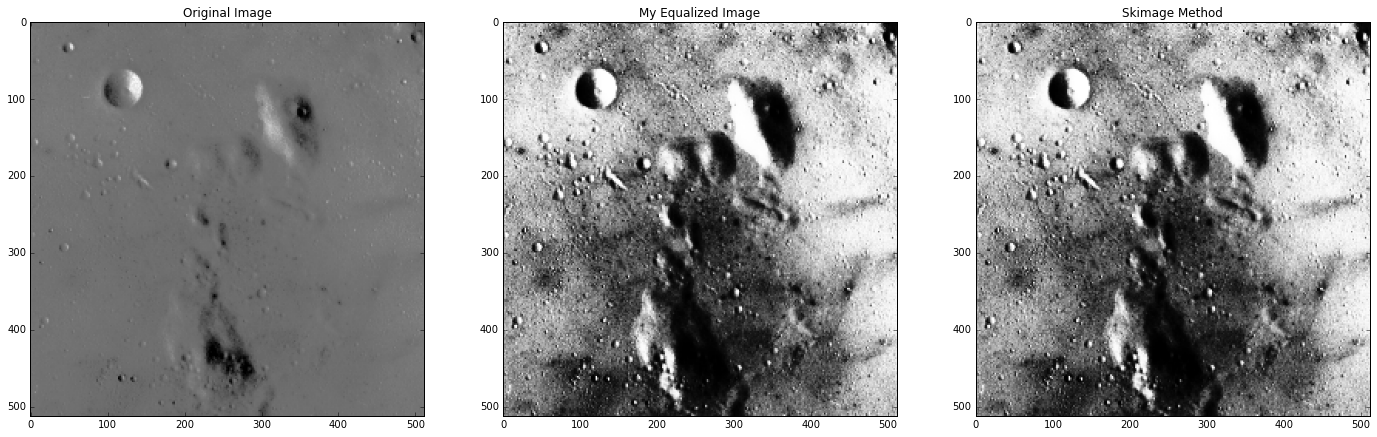

In [125]:
#compare with the built in skimage filter

img_eq = skimage.exposure.equalize_hist(img)

f, ax = plt.subplots(1,3,figsize=(24,8))
ax[0].set_title('Original Image')
ax[0].imshow(img)

ax[1].set_title('My Equalized Image')
ax[1].imshow(img_equalized)

ax[2].set_title('Skimage Method')
ax[2].imshow(img_eq)

## Implement a median filter. 

### Add different levels and types of noise to an image and experiment with different sizes of support for the median filter. As before, compare your implementation with <s>Matlab’s</s> Skimage's and OpenCV's.

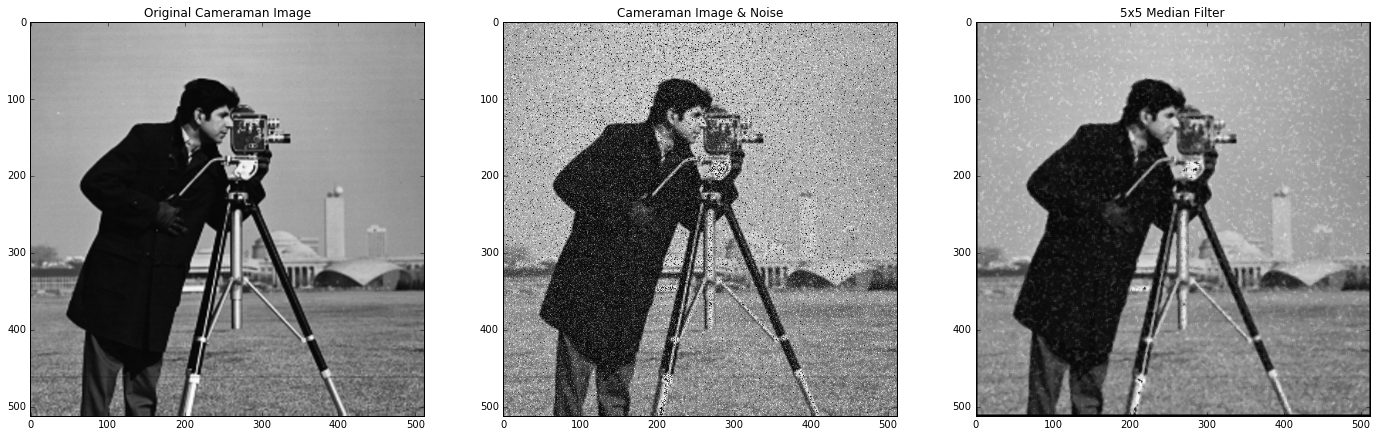

In [126]:
img = data.camera()  #the cameraman image
width,height = img.shape

f, ax = plt.subplots(1,3,figsize=(24,8))
ax[0].set_title('Original Cameraman Image')
ax[0].imshow(img);

noise = np.zeros_like(img)
cv2.randn(noise,0,50)
img_noisy = img + noise

ax[1].set_title('Cameraman Image & Noise')
ax[1].imshow(img_noisy);

img_recover = np.empty_like(img)

for r in range(2,height-2):
    for c in range(2,width-2):
        img_recover[r,c] = np.median(img_noisy[r-2:r+2,c-2:c+2])

ax[2].set_title('5x5 Median Filter')
ax[2].imshow(img_recover);

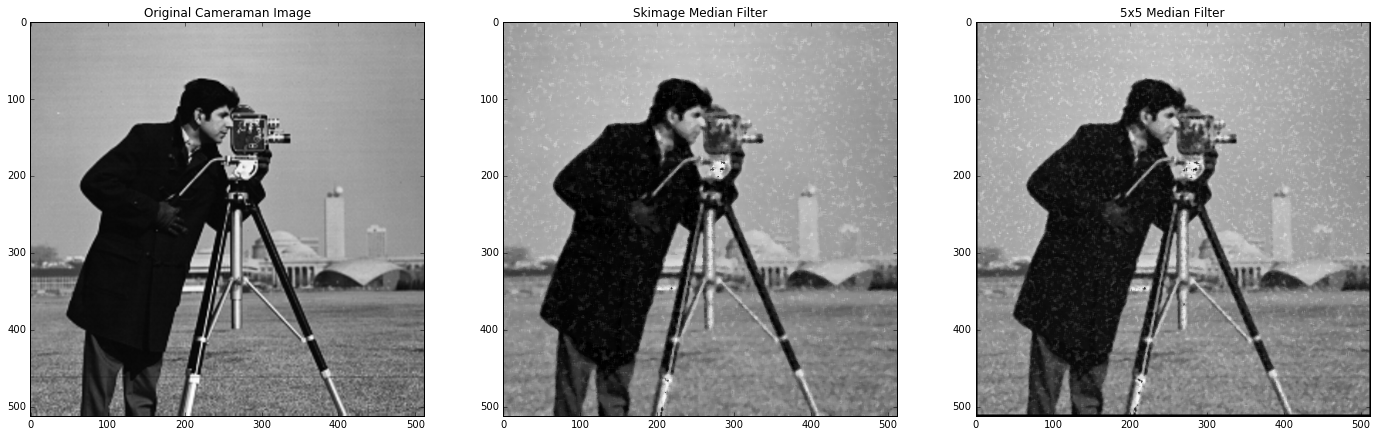

In [127]:
from skimage.morphology import square
from skimage.filters.rank import median
med = median(img_noisy, square(5))

f, ax = plt.subplots(1,3,figsize=(24,8))
ax[0].set_title('Original Cameraman Image')
ax[0].imshow(img);

ax[1].set_title('Skimage Median Filter')
ax[1].imshow(med)

ax[2].set_title('5x5 Median Filter')
ax[2].imshow(img_recover);

# TO DO - use different image...

## Implement the non-local means algorithm. 

Try different window sizes. Add different levels of noise and see the influence of it in the need for larger or smaller neighborhoods. (Such block operations are easy when using Matlab, see for example the function at http://www.mathworks.com/help/images/ref/blockproc.html). Compare your results with those available in IPOL as demonstrated in the video lectures.

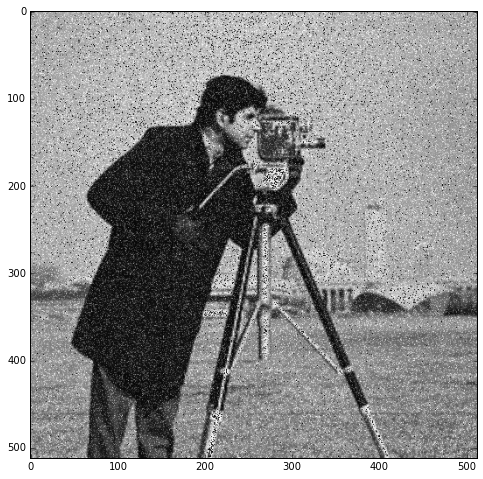

In [128]:
from skimage.restoration import nl_means_denoising

denoise = nl_means_denoising(img_noisy, 8, 20, 0.08, fast_mode=True)
plt.imshow(denoise)

# Consider an image and add to it random noise. 

Repeat this N times, for different values of N, and add the resulting images. What do you observe?

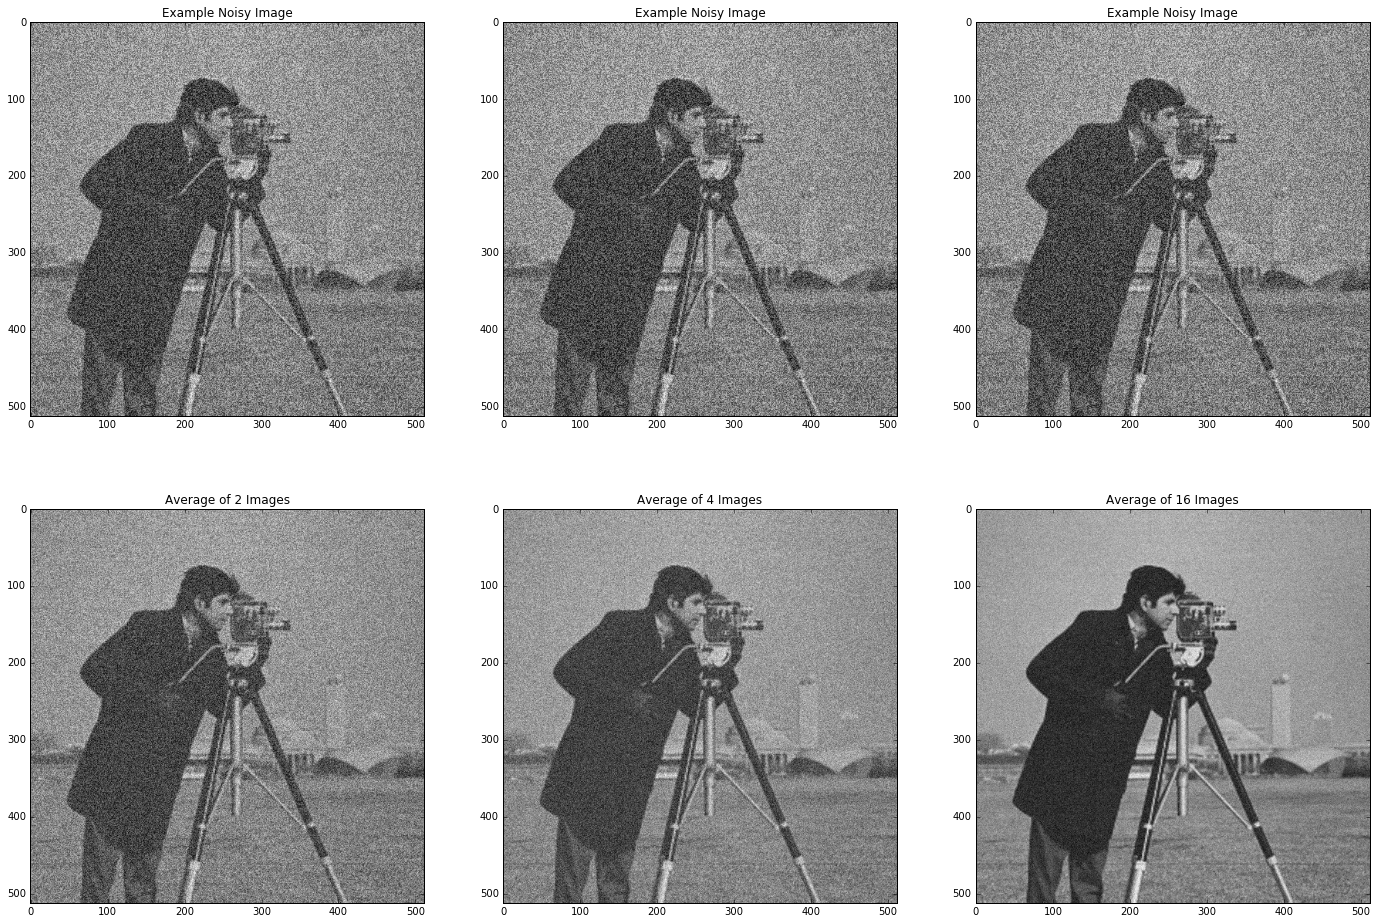

In [142]:
img = data.camera()
width,height = img.shape
img_noisy = []
f, ax = plt.subplots(2,3,figsize=(24,16))
    
N = 16
for i in range(N):
    img_noisy.append(img + 255*np.random.random((width,height)))
    
for i in range(3):
    ax[0,i].imshow(img_noisy[0])
    ax[0,i].set_title('Example Noisy Image')

for c,i in enumerate([2,4,16]):
    ax[1,c].set_title('Average of {} Images'.format(i))
    ax[1,c].imshow(np.average(img_noisy[:i],axis=0));

### Increasing N above creates a nicer image since the random errors cancel out

# Implement the basic color edge detector. 
What happens when the 3 channels are equal?

In [ ]:
TBD

# Take a video and do frame-by-frame histogram equalization and run the resulting video. 
Now consider a group of frames as a large image and do histogram equalization for all of them at once. What looks better? 

In [ ]:
TBD

See this example on how to read and handle videos in Matlab:
xyloObj = VideoReader('xylophone.mp4');

nFrames = xyloObj.NumberOfFrames;
vidHeight = xyloObj.Height;
vidWidth = xyloObj.Width;

% Preallocate movie structure.
mov(1:nFrames) = struct('cdata', zeros(vidHeight, vidWidth, 3, 'uint8'), 'colormap', []);

% Read one frame at a time.
for k = 1 : nFrames
    im = read(xyloObj, k);

    % here we process the image im

    mov(k).cdata = im;
end

% Size a figure based on the video's width and height.
hf = figure;
set(hf, 'position', [150 150 vidWidth vidHeight])

% Play back the movie once at the video's frame rate.
movie(hf, mov, 1, xyloObj.FrameRate);

Take a video and do frame-by-frame non-local means denoising. Repeat but now using a group of frames as a large image. This allows you for example to find more matching blocks (since you are searching across frames). Compare the results. What happens if now you use 3D spatio-temporal blocks, e.g., 5×5×3 blocks and consider the group of frames as a 3D image? Try this and compare with previous results.
Search for “camouflage artist liu bolin.” Do you think you can use the tools you are learning to detect him?

In [ ]:
TBD